# Lab: using clustering to find best store locations

Imagine the following situation:<br>
You own a pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude, Longitude)*. You do not have any stores in this neighborhood, and driving there each time is too expensive (especially with current gas prices). So you decide to open $K$ new stores in this area. The task is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and output the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distance between the store and each delivery address? __Explain your idea in a separate cell below.__

I would find a point that is the closest to all the points in the cluster. To do this, I would calculate the euclidean distance between each delivery location and every possible store location in a cluster, then pick the store location that is on average closest to the delivery locations to be the best store location.

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while they were working as a pizza delivery driver. The file `pizza_delivery_locations.csv` is a projection of the original data and contains only *(Latitude, Longitude)* of each delivery address. 

In [2]:
data_file = "pizza_delivery_locations.csv"

In [135]:
data = pd.read_csv(data_file)
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()
print(', '.join(map(str, data[0])))
print(data.shape) #columns, rows
print(data[0][1])

Index(['Latitude', 'Longitude'], dtype='object')
43.666573, -116.263356
(1301, 2)
-116.263356


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can implement your own clustering algorithm. What distance metric is the most appropriate for this situation?

In [130]:
import numpy as np

def dist(x1, y1, x2, y2):
    #return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return ((x2 - x1)**2 + (y2 - y1)**2)**0.5

def kmeans(data, K, max_iters=100):
    centroids_row_indices = np.random.choice(range(0, data.shape[0]), K, replace=False)
    centroids = [data[i] for i in centroids_row_indices]
    
    for _ in range(max_iters):
        distances = []
        for data_point in data:
            distances_to_centroids = [dist(data_point[0], data_point[1], centroid[0], centroid[1]) for centroid in centroids]
            distances.append(distances_to_centroids)
        
        distances = np.array(distances)
        
        labels = np.argmin(distances, axis=1)
        new_centroids = []
        for k in range(K):
            if np.any(labels == k):
                new_centroids.append(data[labels == k].mean(axis=0))
            else:
                new_centroids.append(data[np.random.choice(range(0, data.shape[0]), 1)][0]) 
        
        new_centroids = np.array(new_centroids)
        
        
        #new_centroids = np.array([data[labels == k].mean(axis=0) for k in range(K)])
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids

#kmeans(data, 4)


In [131]:
def find_best_store_locations(data, K, max_iters=100):
    centroids = kmeans(data, K, max_iters)
    
    best_store_locations = []
    
    for centroid in centroids:
        closest_index = np.argmin([dist(data_point[0], data_point[1], centroid[0], centroid[1]) for data_point in data])
        best_store_locations.append(tuple(data[closest_index]))
    
    return best_store_locations



k_is_2 = find_best_store_locations(data, 2)
k_is_3 = find_best_store_locations(data, 3)
k_is_4 = find_best_store_locations(data, 4)

## Task 2
Visualize clusters by plotting each data point and coloring it with a different color corresponding to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

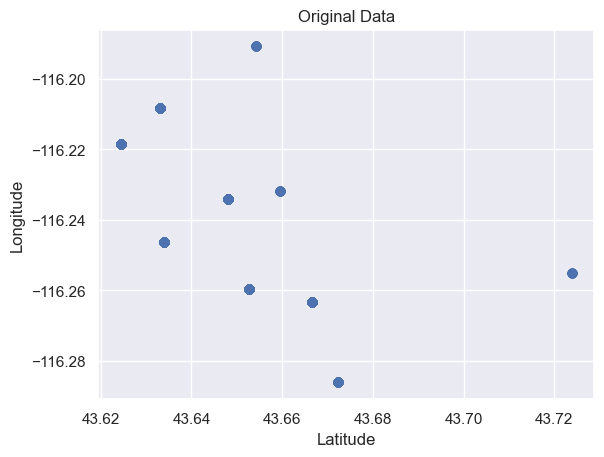

In [132]:
import matplotlib.pyplot as plt

latitude, longitude = zip(*data)
plt.scatter(latitude, longitude)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Original Data')
plt.show()

In [124]:
def plot_clusters(data, centroids, labels, store_locations):
    plt.figure(figsize=(8, 6))
    for i in range(len(np.unique(labels))):
        cluster_data = data[labels == i]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {i+1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='black', label='Centroids')
    if store_locations is not None:
        store_locations = np.array(store_locations)
        plt.scatter(store_locations[:, 0], store_locations[:, 1], marker='o', color='red', label='Store Locations')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.title('K-means Clustering')
    plt.legend()
    plt.grid(True)
    plt.show()

def run_plot_clusters(K):
    centroids = kmeans(data, K)
    store_locations = find_best_store_locations(data, K)

    distances = []
    for data_point in data:
        distances_to_centroids = [dist(data_point[0], data_point[1], centroid[0], centroid[1]) for centroid in centroids]
        distances.append(distances_to_centroids)

    distances = np.array(distances)

    labels = np.argmin(distances, axis=1)

    plot_clusters(data, np.array(centroids), labels, store_locations=store_locations)

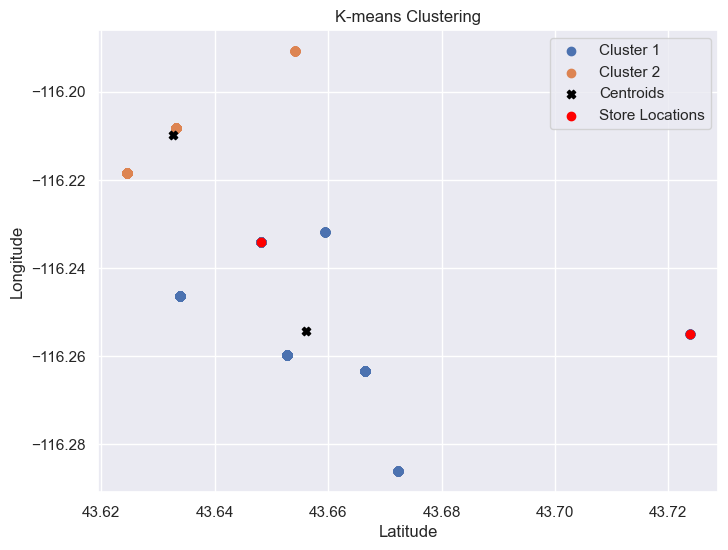

In [133]:
run_plot_clusters(2)

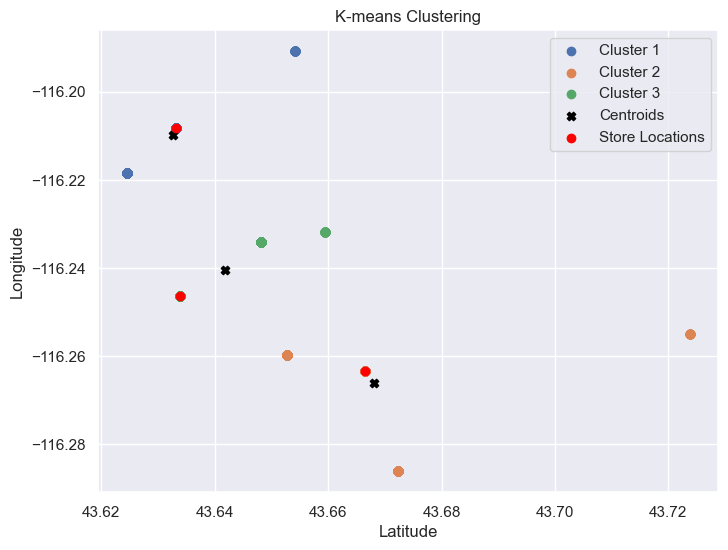

In [126]:
run_plot_clusters(3)

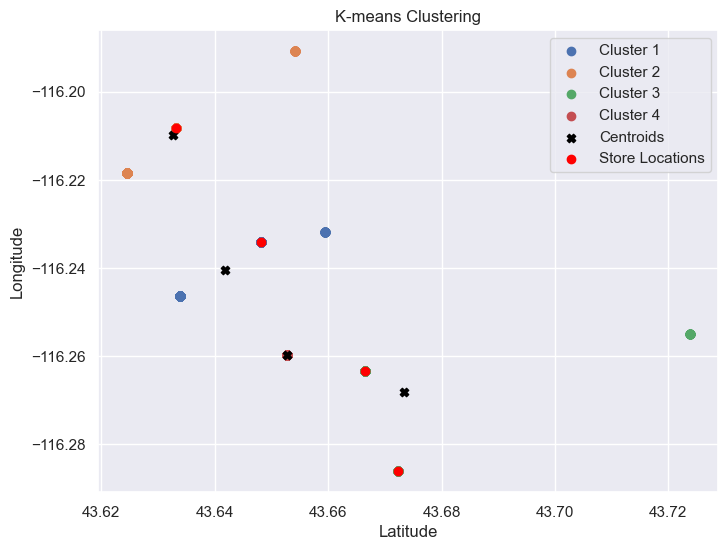

In [127]:
run_plot_clusters(4)

## Examples of cluster visualization in 2D

Plotting original data:
    
<img src="clusters.png">

Plotting clusters with store locations
<img src="locations.png">

Copyright &copy; 2024 Marina Barsky. All rights reserved.